# Recurrent Neural Networks - introduction

# Supervised learning problems

# Supervised learning problems
<p>
<img src = "https://github.com/jermwatt/RNN_demo/blob/dev/images/wright_bros_face_detect.png?raw=true",width=600>
</p>

- typically pattern recognition using vector input/output 

- e.g., object detection (a classification problem) learn to distinguish image patches with e.g., a human face vs all others (image from [[1]](#bib_cell))

# Supervised learning problems

<p>
<img src="https://github.com/jermwatt/RNN_demo/blob/dev/images/lincoln_pixel_values.png?raw=true" width=600,allign="middle"/>
</p>

- **Input:** vector - e.g., a 64 x 64 $\longrightarrow$ $64^2$ x
1 vector

- **Outputs:** labels - integer valued  (image from [[5]](#bib_cell))

# More complex problems

# More complex patterns

Many supervised learning problems have input/output pairs that are *sequences*, e.g.,

# More complex patterns

- **machine translation:** input is a sequence of words in one language (e.g., English) and outputs a sequence of words in another language (e.g., Spanish). 

    - I do not like cats. --> Los gatos me cae mal.

# More complex patterns

- **automatic speech recognition:** input is a sequence (a segment of raw audio) and outputs a sequence of letters (a word or sentence)

<p>
<img src="https://github.com/jermwatt/RNN_demo/blob/dev/images/audio_to_text.png?raw=true" width=900,allign="middle"/>
</p>

# More complex patterns

- **time series prediction:** input an sequence (past series values), output a scalar (future value of series) or  sequence (multiple future values)

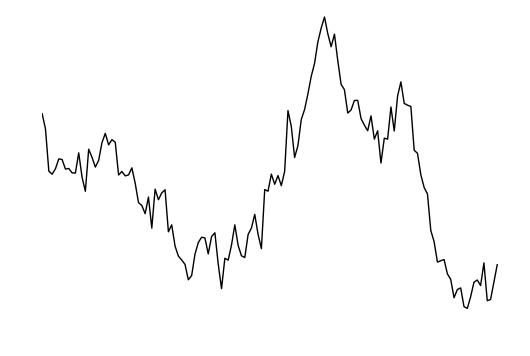

In [1]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### load in and normalize the dataset - # PUT LINK TO DATA
series = np.loadtxt('datasets/apple_prices.csv')

# lets take a look at our time series
plt.plot(series,c = 'k')
plt.axis('off');

# More complex patterns

- **automatic text generation:** input a sequence (text corpus), output a sequence (new predicted characters)

- [Generate wacky sentences](http://www.cs.toronto.edu/~ilya/rnn.html) with this academic RNN text generator

- Various twitter bots that tweet automatically generated text like [this one](http://tweet-generator-alex.herokuapp.com/).

- the [NanoGenMo](https://github.com/NaNoGenMo/2016) annual contest to automatically produce a 50,000+ novel automatically

- [Robot Shakespear](https://github.com/genekogan/RobotShakespeare) a text generator that automatically produces Shakespear-esk sentences

# Problem (!)


- common supervised learning models (e.g., feedforward networks) can't deal with sequence-based input/output pairs directly

- Recurrent Neural Networks - one powerful way of dealing with sequence-based supervised learning problems

# Going deeper into sequence-based learning problems

# Time series prediction

# Time series prediction

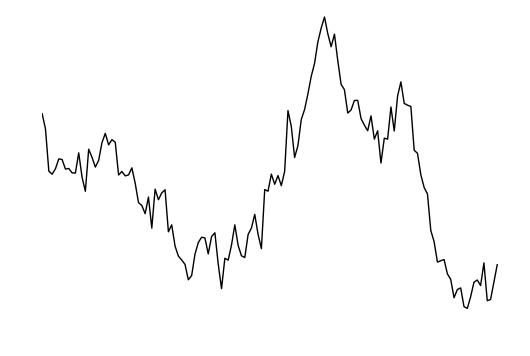

In [2]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### load in and normalize the dataset
series = np.loadtxt('datasets/apple_prices.csv')

# lets take a look at our time series
plt.plot(series,c = 'k')
plt.axis('off');

- A time series is a sequence of numbers $ \mathbf{s} = \langle s_{0},s_{1},s_{2},...,s_{P}\rangle$

# Time series prediction

- A time series is a sequence of numbers $s_{0},s_{1},s_{2},...,s_{P}$

- $s_{p}$ is the numerical value of the time series at time period $p$ and where $P$ is the total length of the series. 

- **input:** sequence of $T$ previous values 
- **output:** next value in series

# time series - sliding window

- produce training set by sliding a window over series and collecting input/output pairs to learn on

<p>
<img src="https://github.com/jermwatt/RNN_demo/blob/dev/images/timeseries_windowing.gif?raw=true" width=1000/>
</p>

# time series - sliding window
<p>
<img src="https://github.com/jermwatt/RNN_demo/blob/dev/images/time_windowing.gif?raw=true" width=1000/>
</p>

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \left[s_{0},s_{1},s_{2},s_{3}\right] & s_{4}\\
\left[s_{1},s_{2},s_{3},s_{4}\right] & s_{5}\\
\vdots & \vdots\\
\left[s_{P-4},s_{P-3},s_{P-2},s_{P-1}\right] & s_{P}
\end{array}$$

# time series - problem type

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \left[s_{0},s_{1},s_{2},s_{3}\right] & s_{4}\\
\left[s_{1},s_{2},s_{3},s_{4}\right] & s_{5}\\
\vdots & \vdots\\
\left[s_{P-4},s_{P-3},s_{P-2},s_{P-1}\right] & s_{P}
\end{array}$$

- inputs *ordered sequences of continuous values*

- with appropriate model (can deal with inputs as sequences) - this is **a regression problem**

- **input:** sequence of $T$ previous values
- **output:** next value in series

# time series - RNN demo

In [3]:
# import custom cutting, fitting, and plotting files
import RNN_series_utils as utils

# window the data using your windowing function
window_size = 7
X,y = utils.window_transform_series(series = series,window_size = window_size)

Using TensorFlow backend.


In [ ]:
# check shapes of input/output pairs
print np.shape(X)
print np.shape(y)

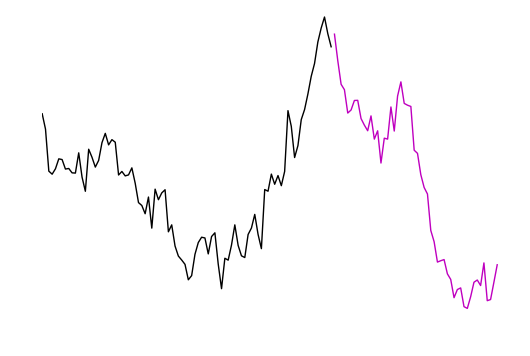

In [4]:
# using first 2/3 of series make predictions on final 1/3 using an RNN
split_pt = int(np.ceil(2*len(y)/float(3)))
plt.plot(series[:split_pt],c = 'k')
plt.plot(np.arange(split_pt,len(series)),series[split_pt:],c = 'm')
plt.axis('off');

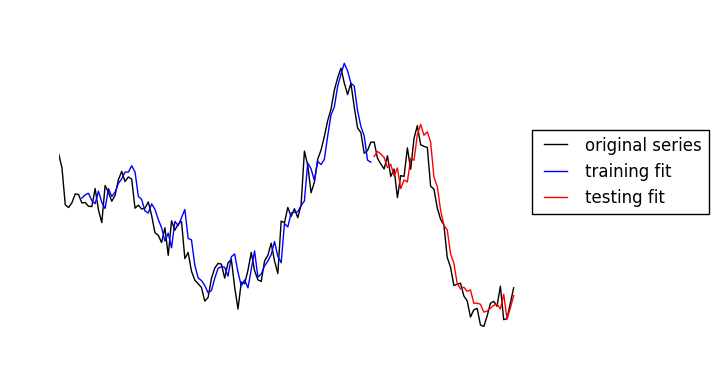

In [5]:
utils.RNN_fit_n_predict(X,y,series)

# Example: text generation

# Text generation 

In [6]:
text = open('cleaned_text.txt').read().lower()
print text[:300]

 i have seldom heard him mention her under any other name. in his eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he wa


- A text is a sequence of characters $s_{0},s_{1},s_{2},...,s_{P}$

- $s_{p}$ is the $p^{th}$ character of the text,  $P$ is the total length of the text 

- **input:** sequence of $T$ previous characters
- **output:** character value in series

# text generation - sliding window

- produce training set by sliding a window over series and collecting input/output pairs to learn on

<p>
<img src="https://github.com/jermwatt/RNN_demo/blob/dev/images/text_windowing.gif?raw=true" width=1000/>
</p>

# input/output pairs from sliding window

<p>
<img src="https://github.com/jermwatt/RNN_demo/blob/dev/images/text_windowing.gif?raw=true" width=1000/>
</p>

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \left[s_{0},s_{1},s_{2},s_{3}\right] & s_{4}\\
\left[s_{3},s_{4},s_{5},s_{6}\right] & s_{7}\\
\vdots & \vdots\\
\left[s_{P-4},s_{P-3},s_{P-2},s_{P-1}\right] & s_{P}
\end{array}$$

# text generation - problem type

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \left[s_{0},s_{1},s_{2},s_{3}\right] & s_{4}\\
\left[s_{3},s_{4},s_{5},s_{6}\right] & s_{7}\\
\vdots & \vdots\\
\left[s_{P-4},s_{P-3},s_{P-2},s_{P-1}\right] & s_{P}
\end{array}$$

- inputs *ordered sequences of characters*

- with appropriate model (can deal with inputs as sequences) - this is **a multiclass classification problem**

- **input:** sequence of $T$ previous character, **output:** next character in series

# text generation + one-hot encoding

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \left[s_{0},s_{1},s_{2},s_{3}\right] & s_{4}\\
\left[s_{3},s_{4},s_{5},s_{6}\right] & s_{7}\\
\vdots & \vdots\\
\left[s_{P-4},s_{P-3},s_{P-2},s_{P-1}\right] & s_{P}
\end{array}$$

-  machine learning algorithm deal with numerical data and all of our input/output pairs are characters

- transform our characters into equivalent numerical values via 'one-hot encoding' scheme

# text generation + one-hot encoding

- transform our characters into equivalent numerical values via 'one-hot encoding' scheme

- each character mapped to all zero vector except one unique lcoation where we place a 1 

$$a\longleftarrow\left[\begin{array}{c}
1\\
0\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,\,\,b\longleftarrow\left[\begin{array}{c}
0\\
1\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,c\longleftarrow\left[\begin{array}{c}
0\\
0\\
1\\
\vdots\\
0\\
0 
\end{array}\right]\cdots$$

# Recurrent Neural Networks (RNNs)

# Recurrent Neural Networks (RNNs)

- natural extension of feedforward networks - where both input and output are ordered sequences

- one powerful way of dealing with sequence-based supervised learning problems

# Architectures: feedforward vs RNN

# Architectures: feedforward

<p>
<img src="https://github.com/jermwatt/RNN_demo/blob/dev/images/dnn2rnn.png?raw=true" width=500 height=500/>
</p>